this lesson is a introduction, where we learn the history of AI, and code some basic stuff. 

Let's start by checking how challenging it is to teach a model to find out if there's a bird in the picture. Why? Because 9 years ago it was considered virtually impossible

In [2]:
from fastbook import *

In [3]:
urls = search_images_ddg('bird photos', max_images= 1)
len(urls), urls[0]

(1,
 'https://photographylife.com/wp-content/uploads/2022/01/LVP0594-NEF_DxO_DeepPRIME-1.jpg')

In [4]:
dest = Path('bird.jpg')

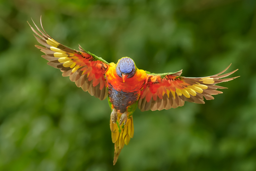

In [6]:
if not dest.exists(): download_url(urls[0], dest, show_progress=False)
im = Image.open(dest)
im.to_thumb(256,256)

The pictures are stored as numbers based on the rgb of each pixel.

In [26]:
searches = 'forest','bird'
path = Path('bird_or_not')

if not path.exists():
    print(path.exists())
    for o in searches:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} photo')
        download_images(dest, urls=results[:200])
        resize_image(dest, max_size=400, dest = dest)
        

In [14]:
failed = verify_images(get_image_files(path = path))
failed.map(Path.unlink)

(#0) []

In [27]:
dls = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter = RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192,method='squish')]
).dataloaders(path)

In [29]:
dls.show_batch(max_n=6)

ValueError: This DataLoader does not contain any batches